In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression as lm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as SSE
%matplotlib inline

In [21]:
df = pd.read_csv('Assignment2.data', sep = '\t')
y_spring = df['SpringPos'].to_numpy()
y_stock = df['StockPrice'].to_numpy()
x = np.arange(1, len(y_spring)+1)

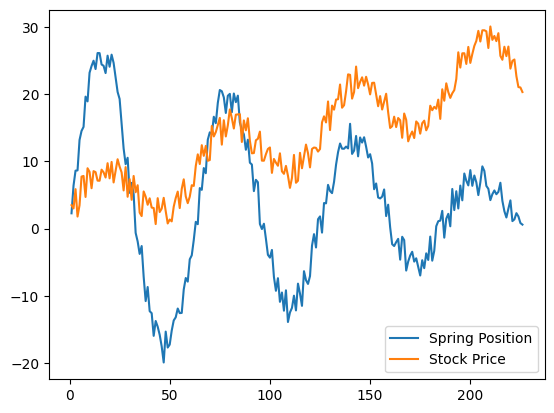

In [22]:
plt.plot(x, y_spring, label = 'Spring Position')
plt.plot(x, y_stock, label = 'Stock Price')
plt.legend()
plt.show()

## Helper functions

In [23]:
def plotter(x, y, w, ylabel, title, xlabel):
    y_pred = w*x
    plt.plot(x, y, 'o')
    plt.plot(x, y_pred)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend(['Actual', 'Predicted'])
    plt.show()

def plotter_2(X, y, W, ylabel, title, xlabel):
    y_pred = X@W[: -1] + W[-1]
    x = np.arange(1, len(y)+1)
    plt.plot(x, y, 'o')
    plt.plot(x, y_pred)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend(['Actual', 'Predicted'])
    plt.show()


## Task 1

### subtask 1

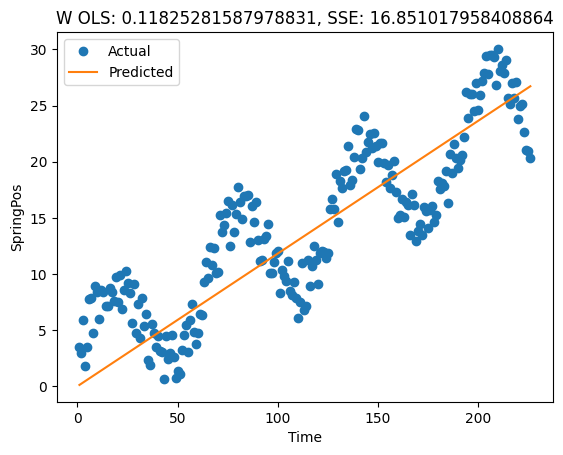

In [24]:
# y = mx 
# w = (X^T X)^-1 X^T y  
# y = Xw
w_ols = x.T @ y_stock / (x.T @ x)
sse_ols = SSE(y_stock, w_ols*x)
plotter(x, y_stock, w_ols, "SpringPos", f"W OLS: {w_ols}, SSE: {sse_ols}", "Time")

### subtask 2

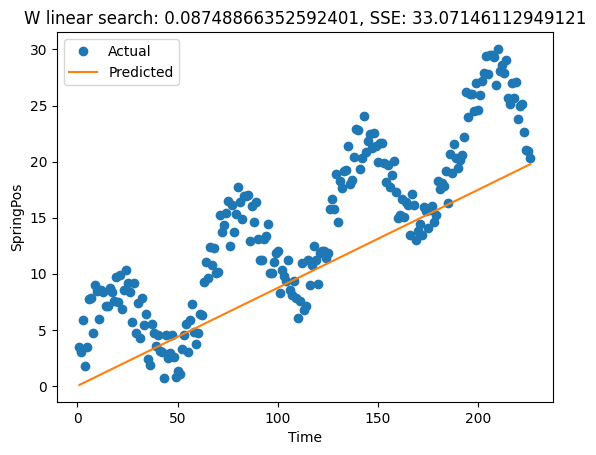

In [25]:
def linear_search():
    w = 0
    w_best = 0
    sse_best = np.inf
    for m in range(0, 61, 5):
        w = math.tan(m*math.pi/180)
        y_pred = w*x
        sse = SSE(y_stock, y_pred)
        if sse < sse_best:
            sse_best = sse
            w_best = w
    return w_best, sse_best

w_linear_search, sse_linear_search = linear_search()
plotter(x, y_stock, w_linear_search, "SpringPos", f"W linear search: {w_linear_search}, SSE: {sse_linear_search}", "Time")

### subtask 3

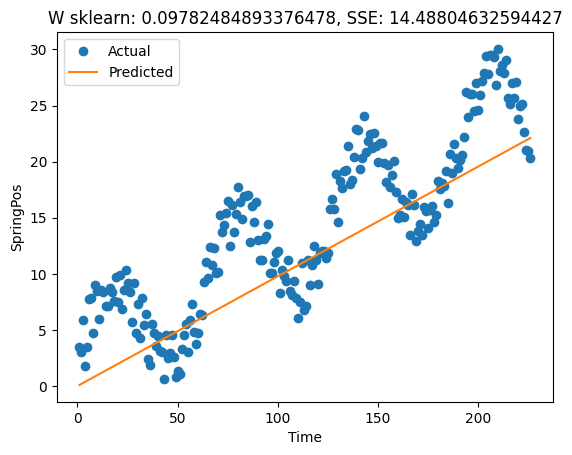

In [26]:
reg = lm()
reg.fit(x.reshape(-1, 1), y_stock)
w_sklearn = reg.coef_[0]
sse_sklearn = SSE(y_stock, reg.predict(x.reshape(-1, 1)))
plotter(x, y_stock, w_sklearn, "SpringPos", f"W sklearn: {w_sklearn}, SSE: {sse_sklearn}", "Time")

## Discussion
<li/> OLS methods finds the solution directly without having to search the entire space for the values
<li/> linear search method relies on the step size and also has an intercept therefore it fits better
<li/> SSE for sklearn performs as wells as the linear search fit

## Task 2

### subtask 1

### Feature transformation

Perform FFT to find the omega

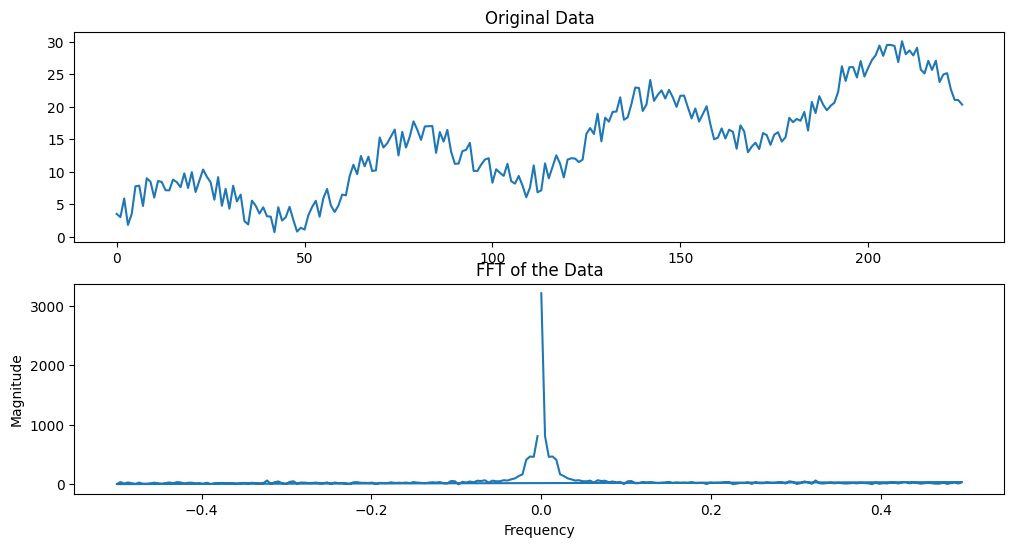

In [27]:
# Perform FFT
fft_result = np.fft.fft(y_stock)

# Get the frequencies corresponding to the FFT result
n = len(y_stock)
frequencies = np.fft.fftfreq(n)

# Plot the original data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y_stock)
plt.title('Original Data')

# Plot the FFT result (magnitude)
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('FFT of the Data')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

Sort the frequency based on power

In [28]:
# Calculate the power of the signal (magnitude squared)
power = np.abs(fft_result) ** 2

# Sort the frequencies based on power
sorted_indices = np.argsort(power)[::-1]
sorted_frequencies = frequencies[sorted_indices]
sorted_power = power[sorted_indices]

Represent the waves

In [29]:
degree = 10
X = np.array([[np.sin(sorted_frequencies[i] * 2 *np.pi * x), np.cos(sorted_frequencies[i] * 2 * np.pi * x)] for i in range(degree)]).T
X = X.reshape((n, degree*2))

### subtask 2

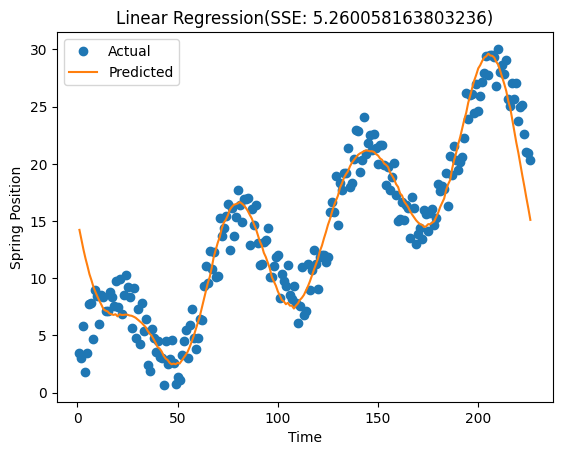

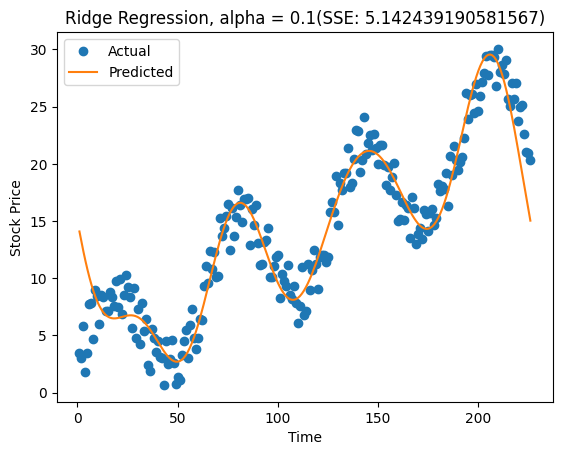

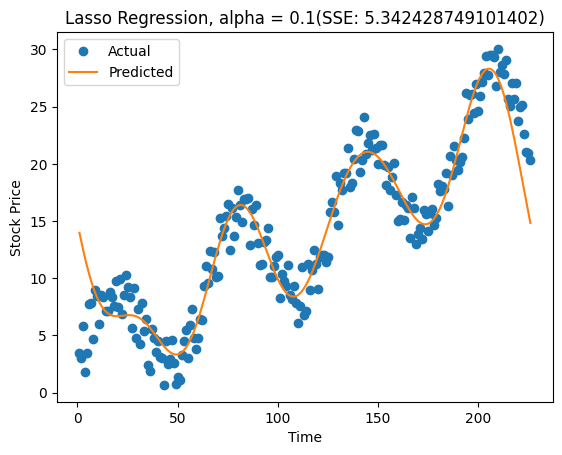

In [30]:
alpha = 0.1

lm_ = lm() 
lm_.fit(X, y_stock)
W = np.append(lm_.coef_, lm_.intercept_)
sse_ls = SSE(y_stock, lm_.predict(X))
plotter_2(X, y_stock, W, "Spring Position", f"Linear Regression(SSE: {sse_ls})", "Time")

ridge = Ridge(alpha = alpha)
ridge.fit(X, y_stock)
W = np.append(ridge.coef_, ridge.intercept_)
sse_ridge = SSE(y_stock, ridge.predict(X))
plotter_2(X, y_stock, W, "Stock Price", f"Ridge Regression, alpha = {alpha}(SSE: {sse_ridge})", "Time")

lasso = Lasso(alpha = alpha)
lasso.fit(X, y_stock)
W = np.append(lasso.coef_, lasso.intercept_)
sse_lasso = SSE(y_stock, lasso.predict(X))
plotter_2(X, y_stock, W, "Stock Price", f"Lasso Regression, alpha = {alpha}(SSE: {sse_lasso})", "Time")

### subtask 3

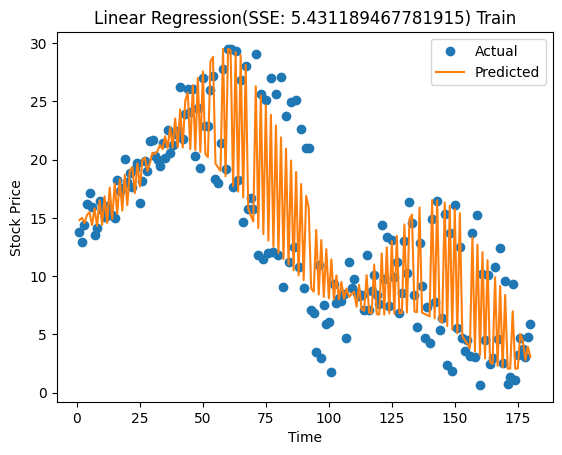

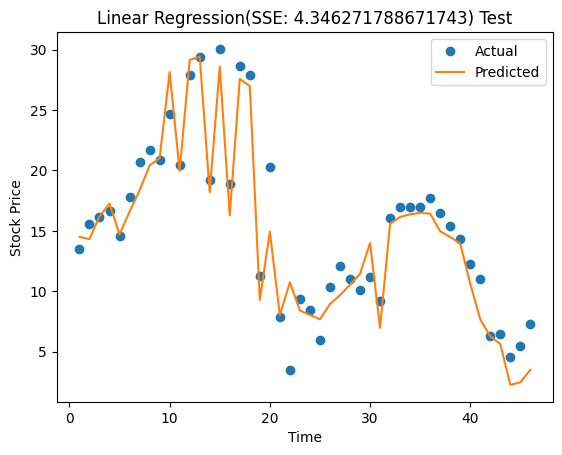

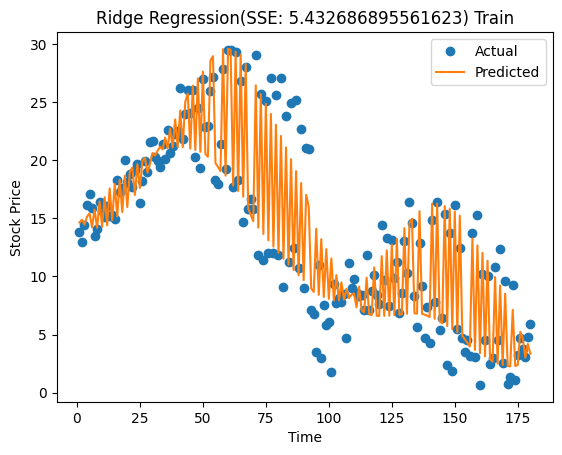

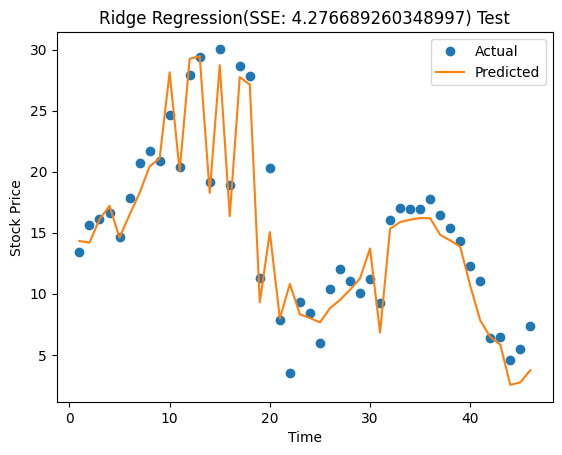

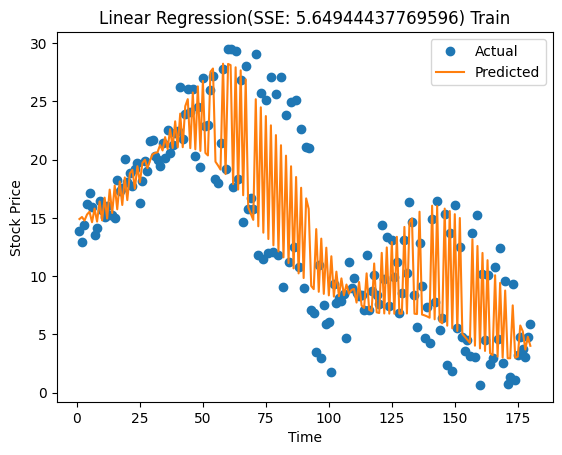

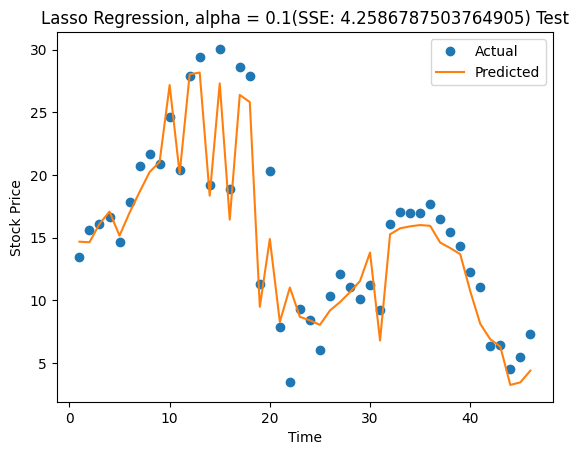

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y_stock, test_size = 0.2, shuffle = True)

sort_indices = np.argsort(x_train[:, 1])  # Sort based on the original feature (x)
x_train = x_train[sort_indices]
y_train = y_train[sort_indices]

sort_indices = np.argsort(x_test[:, 1])  # Sort based on the original feature (x)
x_test = x_test[sort_indices]
y_test = y_test[sort_indices]

alpha = 0.1

lm_ = lm()
lm_.fit(x_train, y_train)
sse_ls = SSE(y_test, lm_.predict(x_test))
sse_train_ls = SSE(y_train, lm_.predict(x_train))
W = np.append(lm_.coef_, lm_.intercept_)
plotter_2(x_train, y_train, W, "Stock Price", f"Linear Regression(SSE: {sse_train_ls}) Train", "Time")
plotter_2(x_test, y_test, W, "Stock Price", f"Linear Regression(SSE: {sse_ls}) Test", "Time")

ridge = Ridge(alpha = alpha)
ridge.fit(x_train, y_train)
sse_ridge = SSE(y_test, ridge.predict(x_test))
sse_train_ridge = SSE(y_train, ridge.predict(x_train))
W = np.append(ridge.coef_, ridge.intercept_)
plotter_2(x_train, y_train, W, "Stock Price", f"Ridge Regression(SSE: {sse_train_ridge}) Train", "Time")
plotter_2(x_test, y_test, W, "Stock Price", f"Ridge Regression(SSE: {sse_ridge}) Test", "Time")

lasso = Lasso(alpha = alpha)
lasso.fit(x_train, y_train)
sse_lasso = SSE(y_test, lasso.predict(x_test))
sse_train_lasso = SSE(y_train, lasso.predict(x_train))
W = np.append(lasso.coef_, lasso.intercept_)
plotter_2(x_train, y_train, W, "Stock Price", f"Linear Regression(SSE: {sse_train_lasso}) Train", "Time")
plotter_2(x_test, y_test, W, "Stock Price", f"Lasso Regression, alpha = {alpha}(SSE: {sse_lasso}) Test", "Time")

### subtask 4

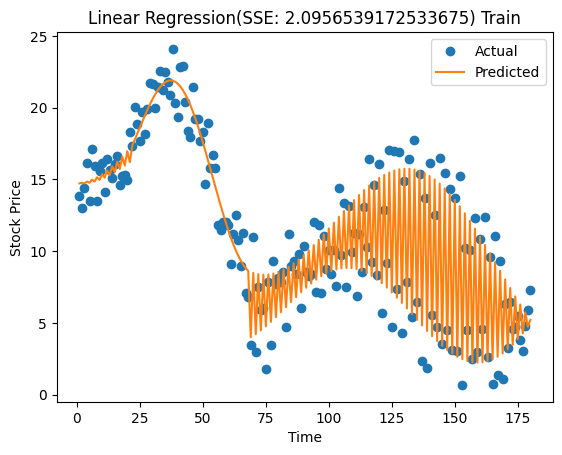

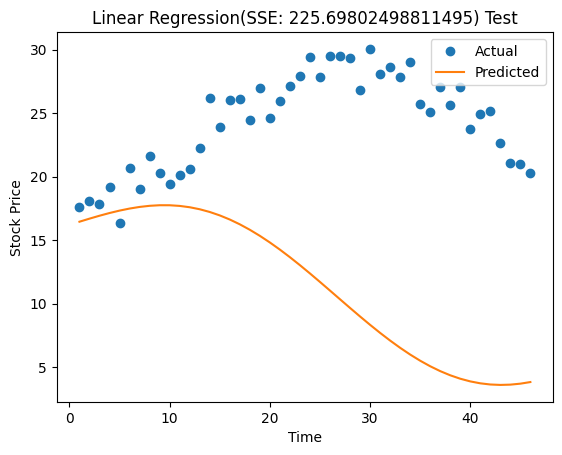

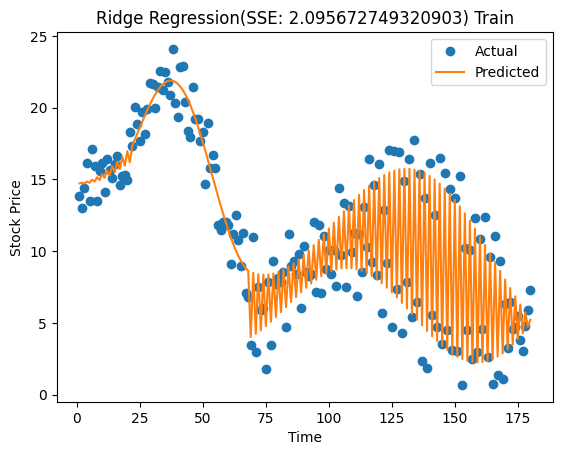

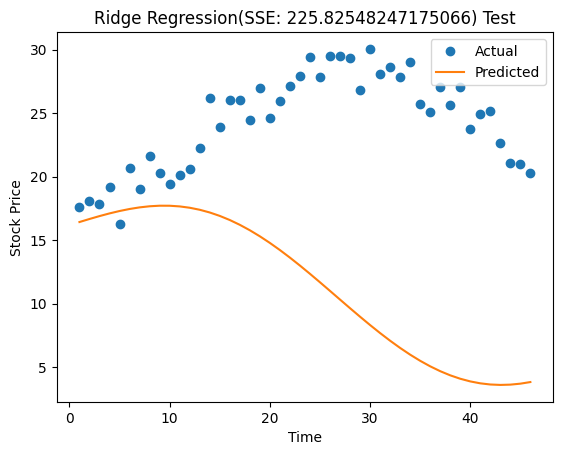

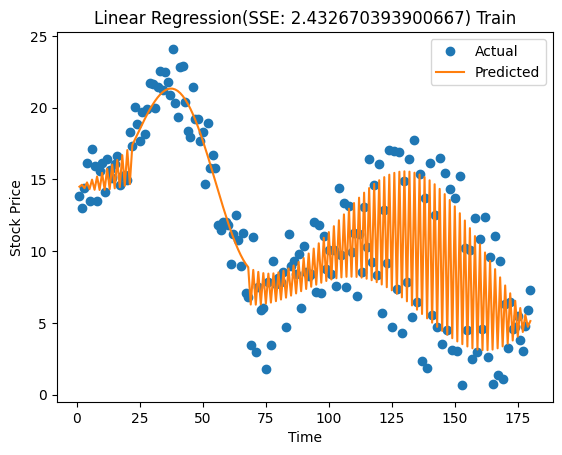

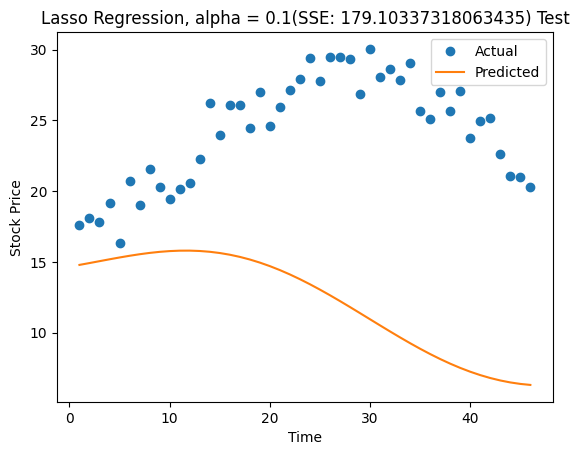

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y_stock, test_size = 0.2, shuffle = False)

sort_indices = np.argsort(x_train[:, 1])  # Sort based on the original feature (x)
x_train = x_train[sort_indices]
y_train = y_train[sort_indices]

sort_indices = np.argsort(x_test[:, 1])  # Sort based on the original feature (x)
x_test = x_test[sort_indices]
y_test = y_test[sort_indices]

alpha = 0.1

lm_ = lm()
lm_.fit(x_train, y_train)
sse_ls = SSE(y_test, lm_.predict(x_test))
sse_train_ls = SSE(y_train, lm_.predict(x_train))
W = np.append(lm_.coef_, lm_.intercept_)
plotter_2(x_train, y_train, W, "Stock Price", f"Linear Regression(SSE: {sse_train_ls}) Train", "Time")
plotter_2(x_test, y_test, W, "Stock Price", f"Linear Regression(SSE: {sse_ls}) Test", "Time")

ridge = Ridge(alpha = alpha)
ridge.fit(x_train, y_train)
sse_ridge = SSE(y_test, ridge.predict(x_test))
sse_train_ridge = SSE(y_train, ridge.predict(x_train))
W = np.append(ridge.coef_, ridge.intercept_)
plotter_2(x_train, y_train, W, "Stock Price", f"Ridge Regression(SSE: {sse_train_ridge}) Train", "Time")
plotter_2(x_test, y_test, W, "Stock Price", f"Ridge Regression(SSE: {sse_ridge}) Test", "Time")

lasso = Lasso(alpha = alpha)
lasso.fit(x_train, y_train)
sse_lasso = SSE(y_test, lasso.predict(x_test))
sse_train_lasso = SSE(y_train, lasso.predict(x_train))
W = np.append(lasso.coef_, lasso.intercept_)
plotter_2(x_train, y_train, W, "Stock Price", f"Linear Regression(SSE: {sse_train_lasso}) Train", "Time")
plotter_2(x_test, y_test, W, "Stock Price", f"Lasso Regression, alpha = {alpha}(SSE: {sse_lasso}) Test", "Time")

## Task 3

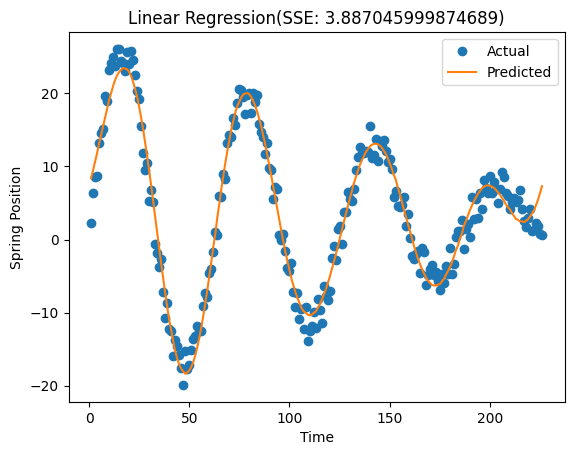

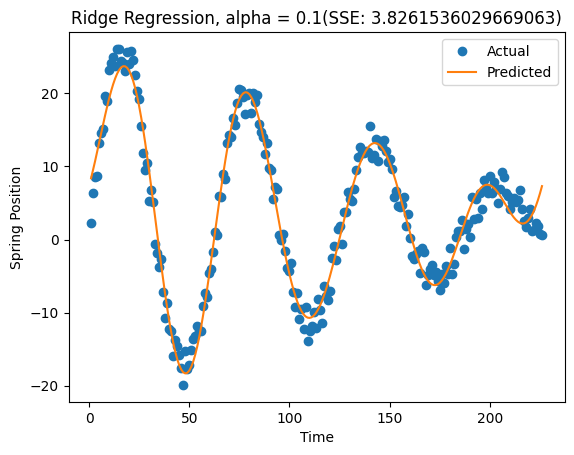

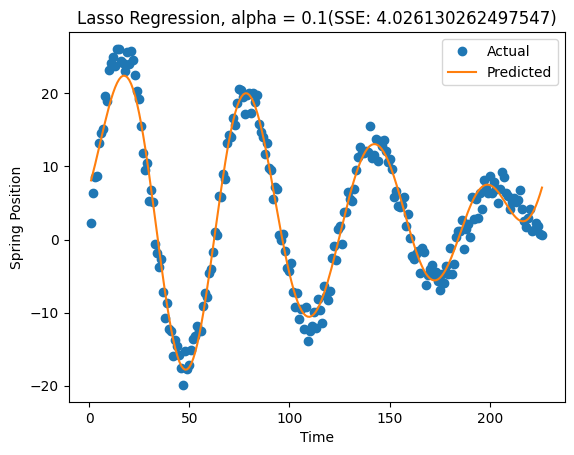

In [33]:
alpha = 0.1

lm_ = lm()
lm_.fit(X, y_spring)
W = np.append(lm_.coef_, lm_.intercept_)
sse_ls = SSE(y_spring, lm_.predict(X))
plotter_2(X, y_spring, W, "Spring Position", f"Linear Regression(SSE: {sse_ls})", "Time")

ridge = Ridge(alpha = alpha)
ridge.fit(X, y_spring)
W = np.append(ridge.coef_, ridge.intercept_)
sse_ridge = SSE(y_spring, ridge.predict(X))
plotter_2(X, y_spring, W, "Spring Position", f"Ridge Regression, alpha = {alpha}(SSE: {sse_ridge})", "Time")

lasso = Lasso(alpha = alpha)
lasso.fit(X, y_spring)
W = np.append(lasso.coef_, lasso.intercept_)
sse_lasso = SSE(y_spring, lasso.predict(X))
plotter_2(X, y_spring, W, "Spring Position", f"Lasso Regression, alpha = {alpha}(SSE: {sse_lasso})", "Time")